In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

Mounted at /content/gdrive


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/PenulisanIlmiah/kekerasan sumut/dataset siga.xlsx')

In [ ]:
print('Jumlah Baris dan Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :\n', data.shape)
print('Jumlah Baris Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 : \n', data.shape[0])
print('Jumlah Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :\n', data.shape[1])

Jumlah Baris dan Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :
 (198, 37)
Jumlah Baris Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 : 
 198
Jumlah Kolom Kasus Kekerasan Provinsi Sumatera Utara Tahun 2018 :
 37


# Data Exploratory Analysis

In [ ]:
# show object variable

categorical = [var for var in data.columns if data[var].dtype=='O']
print('Terdapat {} categorical variabel\n'.format(len(categorical)))
print('Variabel categorical adalah:\n', categorical)

# show categorical and numerical variable

numerikal =[]
for num in data.columns:
  if data[num].dtypes == 'int64':
    numerikal.append(num)
print('\nAda {} variabel numerik:\n'.format(len(numerikal)))
print('Variabel numerik adalah:\n', numerikal)

Terdapat 2 categorical variabel

Variabel categorical adalah:
 ['Kabupaten/Kota', 'Jenis Kelamin']

Ada 35 variabel numerik:

Variabel numerik adalah:
 ['Tahun', 'Kekerasan Fisik', 'Kekerasan Psikis', 'Kekerasan Seksual', 'Eksploitasi', 'Trafficking', 'Penelantaran', 'Kekerasan Lainnya', '0-5 tahun', '6-12 tahun', '13-17 tahun', 'Rumah', 'Tempat Bekerja', 'Lingkungan Masyarakat', 'Sekolah', 'Lainnya', 'Fasilitas Umum', 'Orang Tua', 'Keluarga', 'Tetangga', 'Petugas di sekolah (Guru dll)', 'Teman dekat', 'Lainnya.1', 'Na', 'Suami/Istri', 'Majikan', 'Rekan Kerja', 'Pengaduan', 'Kesehatan', 'Bantuan Hukum dan Penegakan', 'Penegakan', 'Rehabilitasi Sosial', 'Pemulangan dan Reintegrasi Sosial', 'Pendampingan Tokoh Agama', 'Mediasi']


In [ ]:
print('Ringkasan Data Kekerasan Provinsi Sumatera Utara: \n')
data.info()

Ringkasan Data Kekerasan Provinsi Sumatera Utara: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Tahun                              198 non-null    int64 
 1   Kabupaten/Kota                     198 non-null    object
 2   Kekerasan Fisik                    198 non-null    int64 
 3   Kekerasan Psikis                   198 non-null    int64 
 4   Kekerasan Seksual                  198 non-null    int64 
 5   Eksploitasi                        198 non-null    int64 
 6   Trafficking                        198 non-null    int64 
 7   Penelantaran                       198 non-null    int64 
 8   Kekerasan Lainnya                  198 non-null    int64 
 9   0-5 tahun                          198 non-null    int64 
 10  6-12 tahun                         198 non-null    int64 
 11  13-17 tahun        

In [ ]:
print('Statistik Deskriptif Data Kasus Kekerasan Provinsi Sumatera Utara: \n')
desc_data = data.describe()
np.transpose(desc_data)

Statistik Deskriptif Data Kasus Kekerasan Provinsi Sumatera Utara: 



,count,mean,std,min,25%,50%,75%,max
Tahun,198.0,2018.000000,0.818566,2017.0,2017.0,2018.0,2019.00,2019.0
Kekerasan Fisik,198.0,3.494949,4.759972,0.0,0.0,2.0,5.00,23.0
Kekerasan Psikis,198.0,2.924242,6.513502,0.0,0.0,0.0,3.00,50.0
Kekerasan Seksual,198.0,7.459596,11.270819,0.0,0.0,2.0,9.75,57.0
Eksploitasi,198.0,0.065657,0.473385,0.0,0.0,0.0,0.00,5.0
Trafficking,198.0,0.025253,0.186794,0.0,0.0,0.0,0.00,2.0
Penelantaran,198.0,2.287879,6.075076,0.0,0.0,0.0,2.00,48.0
Kekerasan Lainnya,198.0,2.015152,5.799945,0.0,0.0,0.0,1.00,43.0
0-5 tahun,198.0,2.530303,5.929928,0.0,0.0,1.0,2.75,48.0
6-12 tahun,198.0,5.217172,7.388309,0.0,1.0,3.0,6.00,48.0


In [ ]:
print('Korelasi dataset: \n')
corr = data.corr(method='pearson')
corr

Korelasi dataset: 



,Tahun,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Rumah,Tempat Bekerja,Lingkungan Masyarakat,Sekolah,Lainnya,Fasilitas Umum,Orang Tua,Keluarga,Tetangga,Petugas di sekolah (Guru dll),Teman dekat,Lainnya.1,Na,Suami/Istri,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi
Tahun,1.000000,-0.127674,-0.145666,-0.092985,0.170298,0.165992,-0.021436,0.019245,-0.040784,-0.067986,-0.113127,-0.064058,0.151911,-0.328629,-0.065067,0.097884,0.395670,-0.007192,-0.068688,-0.079307,-0.148362,-0.002820,-0.172663,0.242380,0.355820,0.175863,NaN,0.142780,-0.029207,-0.050149,0.228994,-0.014897,0.036712,0.148259,0.102723
Kekerasan Fisik,-0.127674,1.000000,0.685422,0.384335,0.264847,0.042962,0.540979,0.568430,0.620264,0.641980,0.638575,0.625654,0.222185,0.377146,0.546404,0.380786,0.122421,0.550208,0.412586,0.443504,0.269645,0.444731,0.398923,0.049736,0.119512,0.158928,NaN,0.414651,0.385206,0.247471,0.025514,0.237690,-0.063848,0.006579,0.021938
Kekerasan Psikis,-0.145666,0.685422,1.000000,0.403180,0.102045,0.026613,0.473916,0.497192,0.660524,0.627639,0.528237,0.572800,0.071447,0.280373,0.394134,0.367230,0.027167,0.485789,0.344713,0.194843,0.249997,0.134664,0.255133,-0.051735,-0.041573,0.045877,NaN,0.199115,0.232997,0.181796,-0.014264,0.070704,0.048689,0.049673,-0.019405
Kekerasan Seksual,-0.092985,0.384335,0.403180,1.000000,0.082796,0.177703,0.238405,0.302349,0.425150,0.712008,0.832112,0.613449,0.042738,0.695564,0.470790,0.541342,0.044266,0.031460,-0.079777,-0.137519,-0.035871,-0.126361,-0.074901,-0.089861,-0.100418,-0.066539,NaN,0.574298,0.400359,0.341725,0.122011,0.210908,0.045980,-0.006894,0.154419
Eksploitasi,0.170298,0.264847,0.102045,0.082796,1.000000,0.325589,0.154018,0.506213,0.341960,0.246987,0.098919,0.299311,0.770795,-0.074620,0.319459,0.153348,0.236801,0.305552,0.045821,0.178084,0.062227,0.134811,-0.027282,0.139228,0.400046,0.436181,NaN,0.329391,0.157472,0.272040,0.281081,0.106504,-0.017730,0.008181,-0.011662
Trafficking,0.165992,0.042962,0.026613,0.177703,0.325589,1.000000,0.042767,0.187061,0.129912,0.132096,0.179554,0.235519,0.205090,-0.072733,0.070114,0.230896,0.092207,0.053963,0.037538,-0.059648,-0.012336,-0.004057,-0.034676,-0.026822,-0.030855,-0.019461,NaN,0.241499,0.198204,0.127953,0.138495,0.157374,-0.029657,0.210152,-0.011367
Penelantaran,-0.021436,0.540979,0.473916,0.238405,0.154018,0.042767,1.000000,0.784885,0.800179,0.653297,0.496953,0.755695,0.123743,0.255524,0.518719,0.292087,0.057827,0.761305,0.469294,0.258181,0.165974,0.357460,0.416954,-0.031174,0.024186,0.034647,NaN,0.430942,0.371972,0.371152,0.027010,0.482963,0.073203,0.018092,-0.018554
Kekerasan Lainnya,0.019245,0.568430,0.497192,0.302349,0.506213,0.187061,0.784885,1.000000,0.896677,0.716476,0.524674,0.792047,0.435616,0.232771,0.567952,0.346577,0.102079,0.750210,0.413697,0.246867,0.119622,0.308168,0.313864,0.041782,0.183646,0.142340,NaN,0.451757,0.308722,0.387365,0.139998,0.357366,0.019116,0.000447,-0.017006
0-5 tahun,-0.040784,0.620264,0.660524,0.425150,0.341960,0.129912,0.800179,0.896677,1.000000,0.799583,0.598895,0.842511,0.289446,0.338221,0.585289,0.392466,0.062066,0.759060,0.499644,0.234421,0.170070,0.279343,0.363487,-0.017023,0.090976,0.059955,NaN,0.459558,0.378893,0.358858,0.086454,0.341266,0.019910,0.029247,-0.003042
6-12 tahun,-0.067986,0.641980,0.627639,0.712008,0.246987,0.132096,0.653297,0.716476,0.799583,1.000000,0.707661,0.832304,0.192701,0.535088,0.681256,0.475145,0.034317,0.579256,0.325912,0.190063,0.215357,0.195482,0.295347,-0.030664,-0.016532,0.063963,NaN,0.581819,0.439919,0.407376,0.075780,0.351429,0.043581,0.007764,0.151470


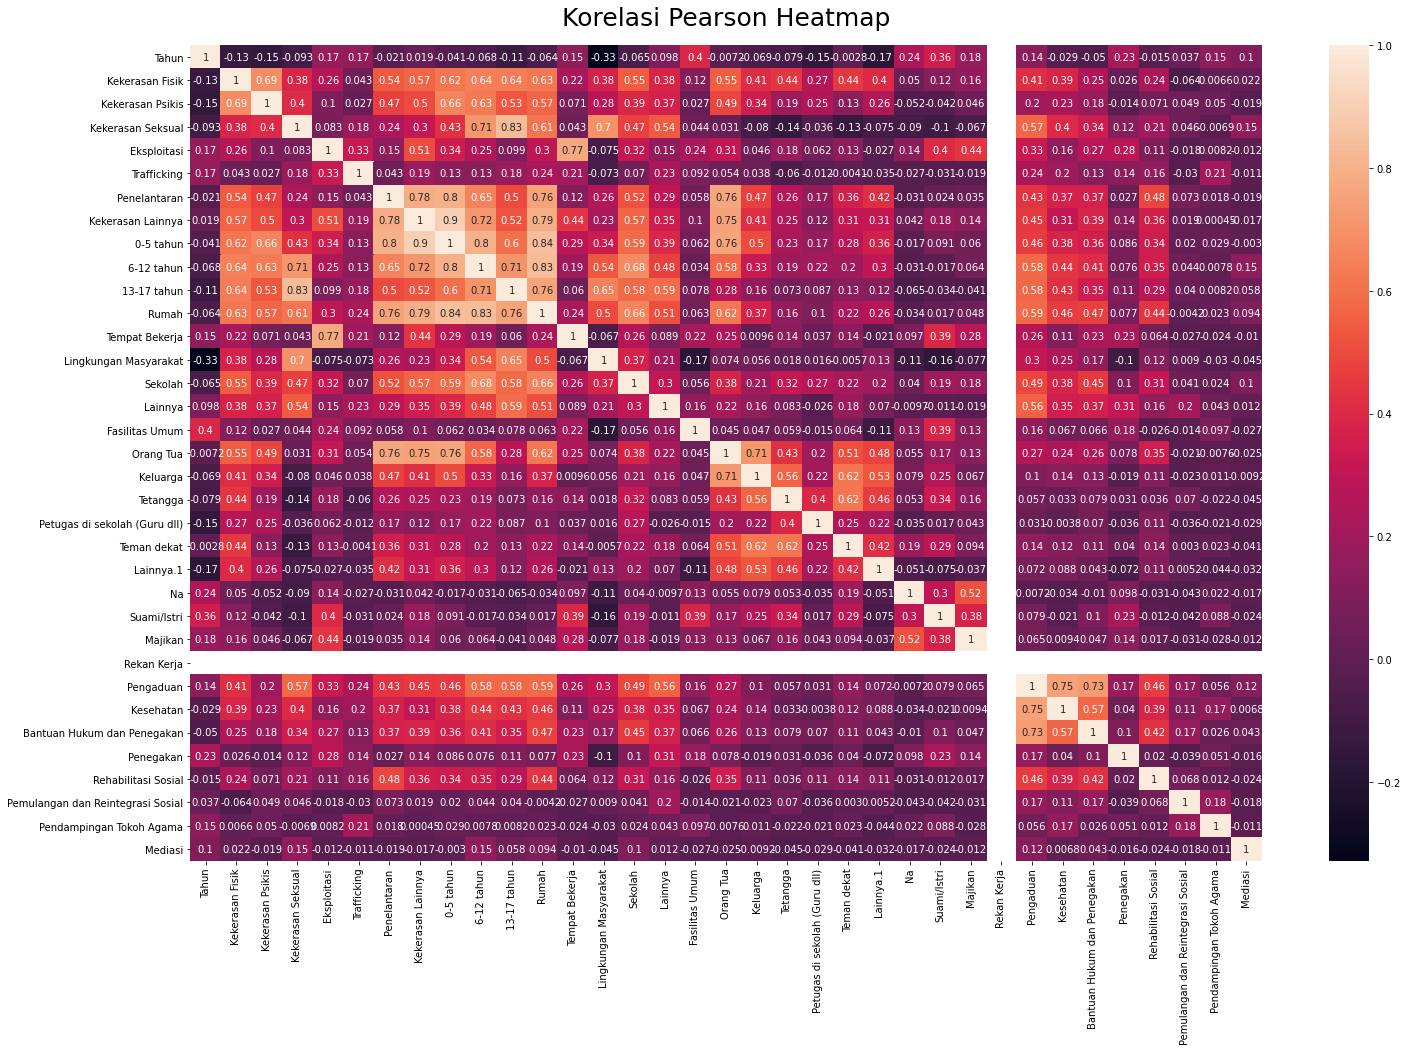

In [ ]:
plt.figure(figsize=(24,15))
sns.heatmap(data=corr, annot=True)
plt.title('Korelasi Pearson Heatmap', pad=20, fontsize=25)
plt.savefig('korelasi.png')
plt.show()

In [ ]:
print('Mengecek keseimbangan data: \n')
print(data['Jenis Kelamin'].value_counts())

Mengecek keseimbangan data: 

Perempuan    99
Laki-laki    99
Name: Jenis Kelamin, dtype: int64


In [ ]:
laki = len(data[data['Jenis Kelamin'] == 'Laki-laki'])
perempuan = len(data[data['Jenis Kelamin'] == 'Perempuan'])

lakipersen = laki/(laki+perempuan)
print('Persentase dari Laki-laki:', lakipersen * 100)

perempuanpersen = perempuan/(laki+perempuan)
print('Persentase dari Perempuan:', perempuanpersen*100)

Persentase dari Laki-laki: 50.0
Persentase dari Perempuan: 50.0


In [ ]:
print('rata-rata korban dan pelaku berdasarkan jenis kelamin: \n')
observ = data.copy()
observ.drop(['Tahun'], axis=1, inplace=True)
observ.groupby(['Jenis Kelamin']).mean()

rata-rata korban dan pelaku berdasarkan jenis kelamin: 



,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Rumah,Tempat Bekerja,Lingkungan Masyarakat,Sekolah,Lainnya,Fasilitas Umum,Orang Tua,Keluarga,Tetangga,Petugas di sekolah (Guru dll),Teman dekat,Lainnya.1,Na,Suami/Istri,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi
Jenis Kelamin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Laki-laki,3.808081,2.080808,1.737374,0.060606,0.000000,2.272727,1.818182,1.797980,3.535354,3.969697,3.626263,0.020202,1.616162,0.636364,1.676768,0.242424,4.888889,1.939394,4.727273,0.898990,3.898990,3.363636,0.939394,1.757576,0.040404,0.0,6.767677,1.212121,2.666667,0.151515,0.262626,0.373737,0.101010,0.000000
Perempuan,3.181818,3.767677,13.181818,0.070707,0.050505,2.303030,2.212121,3.262626,6.898990,9.505051,8.000000,0.010101,4.565657,0.989899,3.373737,0.272727,1.292929,0.363636,0.454545,0.181818,0.363636,0.616162,0.000000,0.090909,0.000000,0.0,14.262626,3.121212,6.545455,0.343434,0.444444,0.363636,0.252525,0.191919


In [ ]:
print('rata-rata banyaknya kasus berdasarkan tahun:\n')
data.groupby(['Tahun']).mean()

rata-rata banyaknya kasus berdasarkan tahun:



,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Rumah,Tempat Bekerja,Lingkungan Masyarakat,Sekolah,Lainnya,Fasilitas Umum,Orang Tua,Keluarga,Tetangga,Petugas di sekolah (Guru dll),Teman dekat,Lainnya.1,Na,Suami/Istri,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi
Tahun,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,4.121212,4.242424,8.333333,0.00000,0.000000,2.000000,1.878788,2.621212,5.454545,7.348485,6.348485,0.000000,4.636364,0.893939,2.212121,0.000000,2.893939,1.409091,3.106061,0.848485,2.030303,2.454545,0.000000,0.000000,0.000000,0.0,5.575758,1.772727,5.333333,0.000000,0.257576,0.242424,0.030303,0.000000
2018,3.727273,2.606061,8.272727,0.00000,0.000000,3.181818,2.015152,2.939394,5.969697,7.954545,6.348485,0.000000,4.636364,0.893939,2.212121,0.000000,3.666667,1.030303,2.439394,0.484848,2.363636,2.696970,0.000000,0.000000,0.000000,0.0,14.803030,3.318182,4.712121,0.000000,0.590909,0.469697,0.136364,0.000000
2019,2.636364,1.924242,5.772727,0.19697,0.075758,1.681818,2.151515,2.030303,4.227273,4.909091,4.742424,0.045455,0.000000,0.651515,3.151515,0.772727,2.712121,1.015152,2.227273,0.287879,2.000000,0.818182,1.409091,2.772727,0.060606,0.0,11.166667,1.409091,3.772727,0.742424,0.212121,0.393939,0.363636,0.287879


In [ ]:
datatahun = data.loc[:,'Tahun':'13-17 tahun']
datatahun.drop(['Kabupaten/Kota'], axis=1, inplace=True)
datatahun['Total'] = datatahun.loc[:,'Kekerasan Fisik':'13-17 tahun'].sum(axis=1)
datagroup = datatahun.groupby(['Tahun']).sum().reset_index()
datagroup

,Tahun,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Total
0,2017,272,280,550,0,0,132,124,173,360,485,2376
1,2018,246,172,546,0,0,210,133,194,394,525,2420
2,2019,174,127,381,13,5,111,142,134,279,324,1690


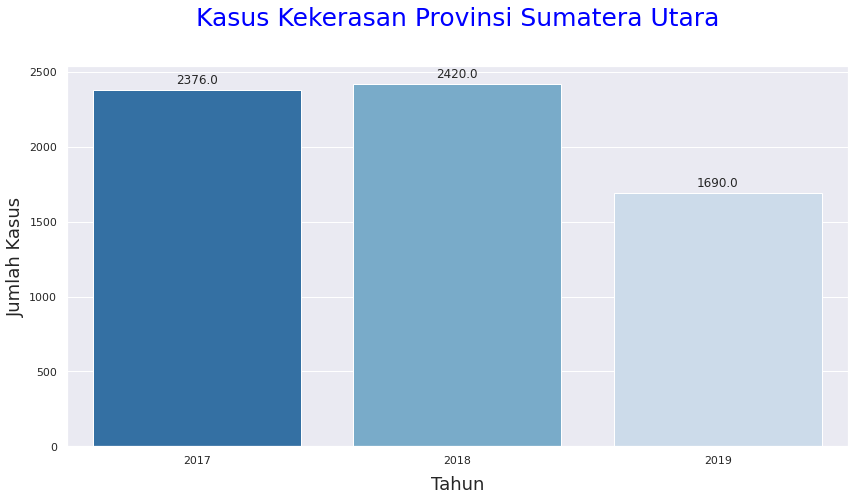

In [ ]:
plt.figure(figsize=(14,7))
sns.set()
var = datagroup['Tahun']
num = datagroup['Total']
bars = sns.barplot(x=var,y=num, data = datagroup,palette='Blues_r')

for p in bars.patches:
  bars.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center', 
               xytext = (0, 10), 
               textcoords = 'offset pixels',
               fontsize=12)

plt.xlabel('Tahun', fontsize=18, labelpad=10)
plt.ylabel('Jumlah Kasus', fontsize=18)
plt.title('Kasus Kekerasan Provinsi Sumatera Utara', pad=40, fontsize=25, color='blue')
plt.xticks(rotation=0)
plt.savefig('jumlah kasus berdasrkan tahun.png', bbox_tight=True)
plt.show()

In [ ]:
datagroup=data.loc[:,'Tahun':'Kekerasan Lainnya']
datagroup.drop(['Kabupaten/Kota'], axis=1, inplace=True)
datagroup['Total'] = datagroup.loc[:,'Kekerasan Fisik':'Kekerasan Lainnya'].sum(axis=1)
datagrouptahun = datagroup.groupby(['Tahun'])[['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Eksploitasi','Trafficking','Penelantaran','Kekerasan Lainnya']].sum()
datagrouptahun

,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya
Tahun,,,,,,,
2017,272,280,550,0,0,132,124
2018,246,172,546,0,0,210,133
2019,174,127,381,13,5,111,142


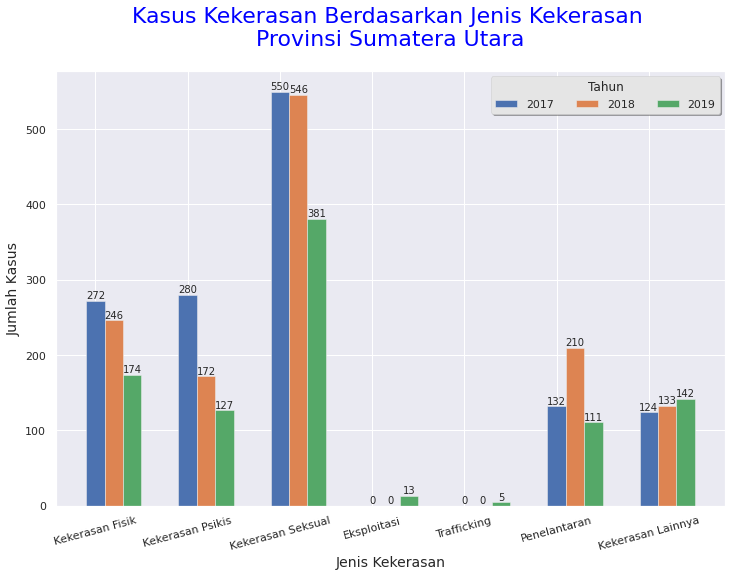

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('ggplot')
labels = ['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual',
          'Eksploitasi','Trafficking','Penelantaran','Kekerasan Lainnya']
x = np.arange(7)
datagroup_tjenis = np.transpose(datagrouptahun)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(datagroup_tjenis.columns):
  bar = plt.bar(x+(a*width), datagroup_tjenis[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x-0, labels=datagroup_tjenis.index, rotation=15)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Jenis Kekerasan \nProvinsi Sumatera Utara', fontsize=22, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Jenis Kekerasan', fontsize=14)
plt.legend(ncol=3, fancybox=True, shadow=True, loc='upper right', title='Tahun')
plt.savefig('jumlah kasus berdasrkan jenis kekerasan.png')
plt.show()

In [ ]:
datagroupusia=data[['Tahun','0-5 tahun','6-12 tahun','13-17 tahun']]
datausia = datagroupusia.groupby(['Tahun'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()
datausia


,0-5 tahun,6-12 tahun,13-17 tahun
Tahun,,,
2017,173,360,485
2018,194,394,525
2019,134,279,324


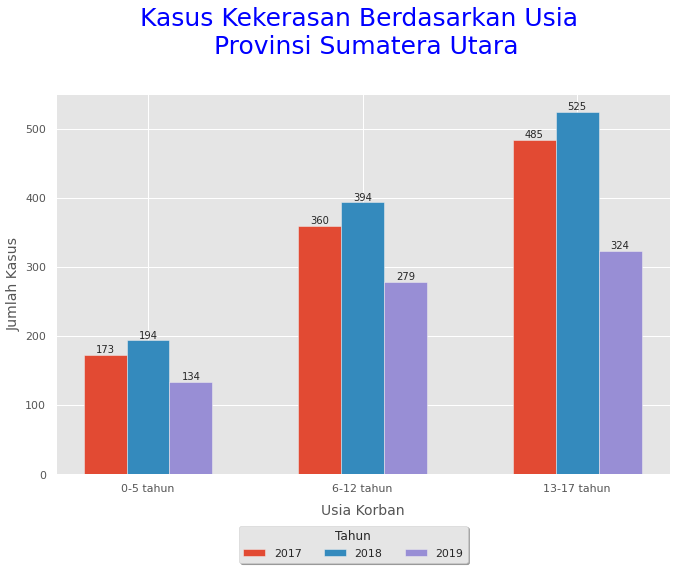

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
datagroup_age = np.transpose(datausia)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(datagroup_age.columns):
  bar = plt.bar(x+(a*width), datagroup_age[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.2, labels=datagroup_age.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia \n Provinsi Sumatera Utara', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Usia Korban', fontsize=14, labelpad=10)
plt.legend(ncol=3, fancybox=True, shadow=True, bbox_to_anchor=(0.68,-0.12), title='Tahun')
plt.savefig('jumlah kasus berdasarkan usia.png')
plt.show()

In [ ]:
datagroupjk=data[['Tahun','Jenis Kelamin','Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Kekerasan Lainnya']]
datagroupjk['Total'] = datagroupjk[['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Kekerasan Lainnya']].sum(axis=1)
datagroupjk = datagroupjk.groupby(['Jenis Kelamin'])[['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Kekerasan Lainnya']].sum()
datagroupjk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Penelantaran,Kekerasan Lainnya
Jenis Kelamin,,,,,
Laki-laki,377,206,172,225,180
Perempuan,315,373,1305,228,219


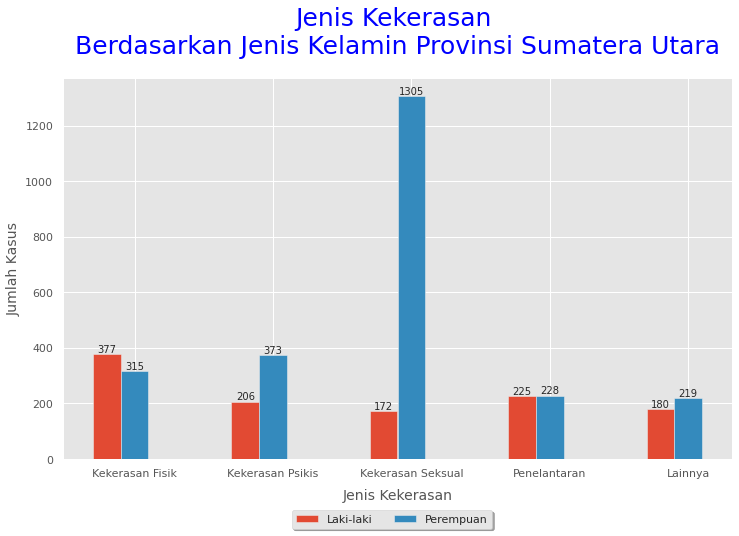

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
plt.style.use('ggplot')
labels = ['Kekerasan Fisik','Kekerasan Psikis','Kekerasan Seksual','Penelantaran','Lainnya']
x = np.arange(5)
datagroup_jkt = np.transpose(datagroupjk)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(datagroup_jkt.columns):
  bar = plt.bar(x+(a*width), datagroup_jkt[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.2, labels=datagroup_jkt.index)
ax.set_xticklabels(labels)
ax.set_title('Jenis Kekerasan \nBerdasarkan Jenis Kelamin Provinsi Sumatera Utara', fontsize=25, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Jenis Kekerasan', fontsize=14, labelpad=10)
plt.legend(ncol=3, fancybox=True, shadow=True, bbox_to_anchor=(0.65,-0.12))
plt.savefig('jumlah kasus jenis kekerasan berdasrkan jenis kelamin.png', bbox_tight=True)
plt.show()

In [ ]:
data17 = data[data['Tahun'] == 2017]
usia17=data17[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia17 = usia17.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()


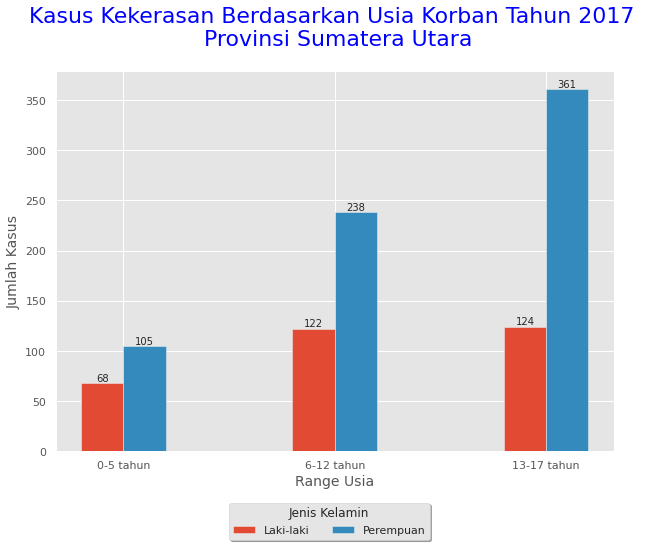

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
usia17t = np.transpose(usia17)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(usia17t.columns):
  bar = plt.bar(x+(a*width), usia17t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=usia17t.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia Korban Tahun 2017 \n Provinsi Sumatera Utara', fontsize=22, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Range Usia', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.68,-0.12), title='Jenis Kelamin')
plt.savefig('jumlah kasus berdasrkan usia korban 2017.png', bbox_tight=True)
plt.show()

In [ ]:
data18 = data[data['Tahun'] == 2018]
usia18=data18[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia18 = usia18.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()
data18[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]

,Jenis Kelamin,0-5 tahun,6-12 tahun,13-17 tahun
66,Laki-laki,0,0,0
67,Perempuan,1,1,7
68,Laki-laki,2,9,2
69,Perempuan,2,8,5
70,Laki-laki,0,1,2
...,...,...,...,...
127,Perempuan,0,0,0
128,Laki-laki,2,3,8
129,Perempuan,14,22,43
130,Laki-laki,2,6,2


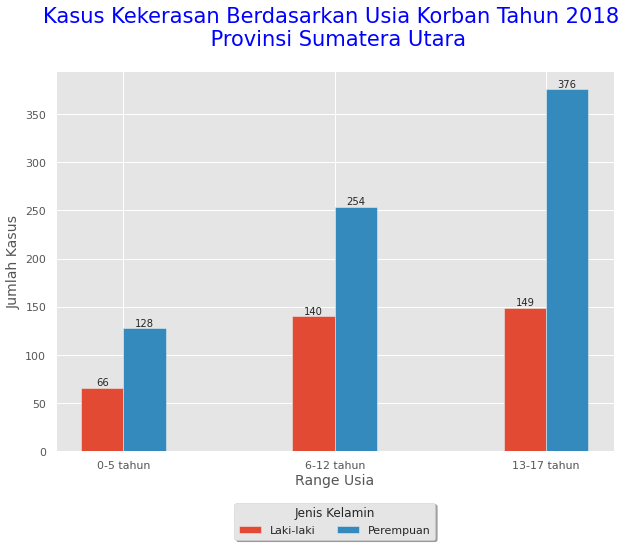

In [ ]:
data18 = data[data['Tahun'] == 2018]
usia18=data18[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia18 = usia18.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
usia18t = np.transpose(usia18)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(usia18t.columns):
  bar = plt.bar(x+(a*width), usia18t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=usia18t.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia Korban Tahun 2018 \n Provinsi Sumatera Utara', fontsize=21, pad=25, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Range Usia', fontsize=14, labelpad=3)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.69,-0.12), title='Jenis Kelamin')
plt.savefig('jumlah kasus berdasrkan usia korban 2018.png', bbox_tight=True)
plt.show()

In [ ]:
data19 = data[data['Tahun'] == 2019]
usia19=data19[['Jenis Kelamin','0-5 tahun','6-12 tahun','13-17 tahun']]
usia19 = usia19.groupby(['Jenis Kelamin'])[['0-5 tahun','6-12 tahun','13-17 tahun']].sum()

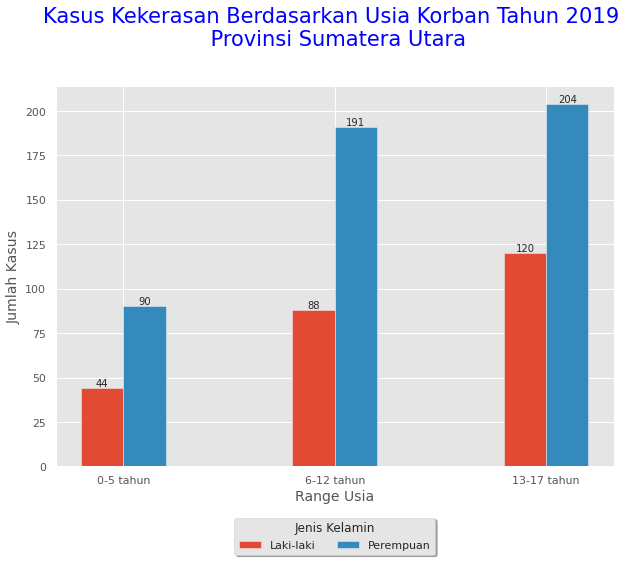

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')
labels = ['0-5 tahun','6-12 tahun','13-17 tahun']
x = np.arange(3)
usia19t = np.transpose(usia19)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)) , # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(usia19t.columns):
  bar = plt.bar(x+(a*width), usia19t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=usia19t.index)
ax.set_xticklabels(labels)
ax.set_title('Kasus Kekerasan Berdasarkan Usia Korban Tahun 2019 \n Provinsi Sumatera Utara', fontsize=21, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Range Usia', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.69,-0.12), title='Jenis Kelamin')
plt.savefig('jumlah kasus berdasrkan usia korban 2019.png', bbox_tight=True)
plt.show()

In [ ]:
datatempat17 = data[data['Tahun'] == 2017]
tempat17=datatempat17[['Jenis Kelamin','Rumah','Tempat Bekerja','Lingkungan Masyarakat','Sekolah','Lainnya']]
tempat17 = tempat17.groupby(['Jenis Kelamin'])[['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']].sum()

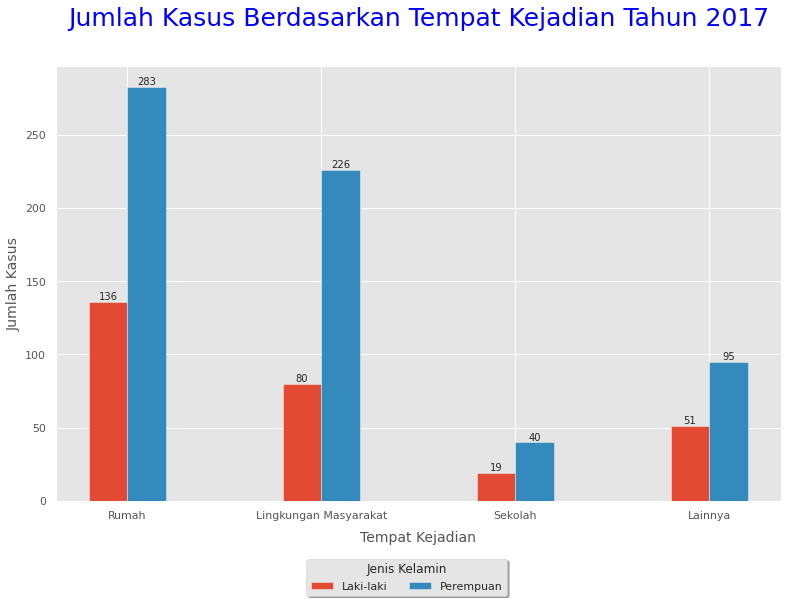

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('ggplot')
labels = ['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']
x = np.arange(4)
tempat17_t = np.transpose(tempat17)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(tempat17_t.columns):
  bar = plt.bar(x+(a*width), tempat17_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=tempat17_t.index)
ax.set_xticklabels(labels)
ax.set_title('Jumlah Kasus Berdasarkan Tempat Kejadian Tahun 2017', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Tempat Kejadian', fontsize=14, labelpad=10)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.63,-0.12), title='Jenis Kelamin')
plt.show()

In [ ]:
datatempat18 = data[data['Tahun'] == 2018]
tempat18=datatempat17[['Jenis Kelamin','Rumah','Tempat Bekerja','Lingkungan Masyarakat','Sekolah','Lainnya']]
tempat18 = tempat18.groupby(['Jenis Kelamin'])[['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']].sum()

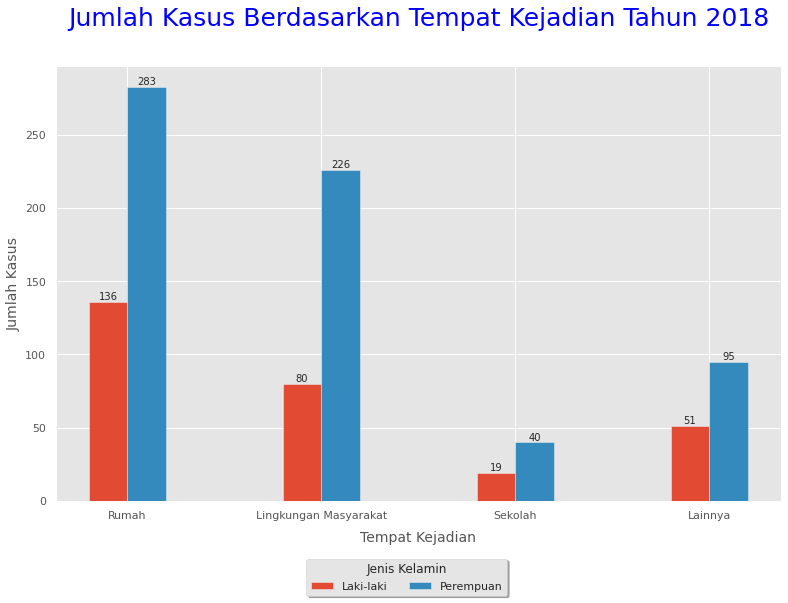

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('ggplot')
labels = ['Rumah','Lingkungan Masyarakat','Sekolah','Lainnya']
x = np.arange(4)
tempat18_t = np.transpose(tempat18)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(tempat18_t.columns):
  bar = plt.bar(x+(a*width), tempat18_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=tempat18_t.index)
ax.set_xticklabels(labels)
ax.set_title('Jumlah Kasus Berdasarkan Tempat Kejadian Tahun 2018', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Tempat Kejadian', fontsize=14, labelpad=10)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.63,-0.12), title='Jenis Kelamin')
plt.show()

In [ ]:
datatempat19 = data[data['Tahun'] == 2019]
tempat19=datatempat19[['Jenis Kelamin','Rumah','Tempat Bekerja','Lingkungan Masyarakat','Sekolah','Lainnya','Fasilitas Umum']]
tempat19 = tempat19.groupby(['Jenis Kelamin'])[['Rumah','Tempat Bekerja','Sekolah','Lainnya','Fasilitas Umum']].sum()

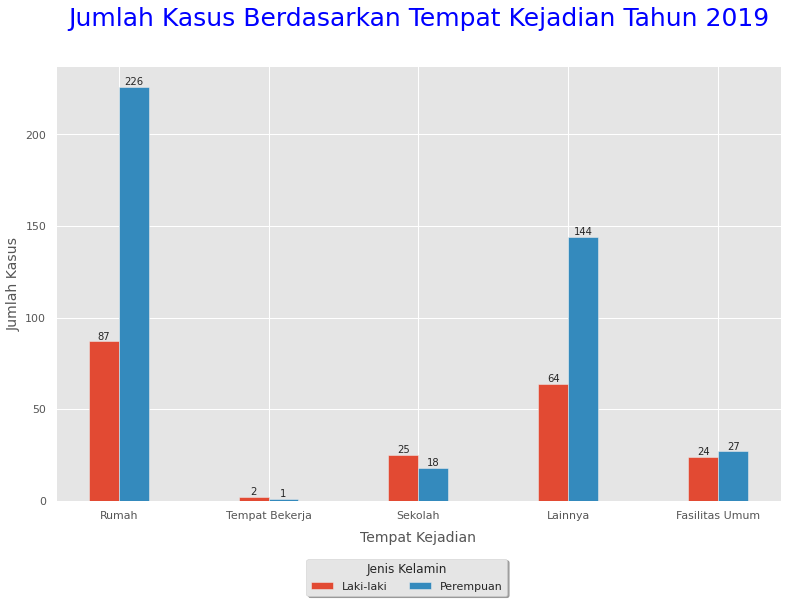

In [ ]:
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('ggplot')
labels = ['Rumah','Tempat Bekerja','Sekolah','Lainnya','Fasilitas Umum']
x = np.arange(5)
tempat19_t = np.transpose(tempat19)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(tempat19_t.columns):
  bar = plt.bar(x+(a*width), tempat19_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=tempat19_t.index)
ax.set_xticklabels(labels)
ax.set_title('Jumlah Kasus Berdasarkan Tempat Kejadian Tahun 2019', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Tempat Kejadian', fontsize=14, labelpad=10)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.63,-0.12), title='Jenis Kelamin')
plt.show()

In [ ]:
datalayanan17 = data[data['Tahun'] == 2017]
layanan17=datalayanan17[['Jenis Kelamin','Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']]
layanan17 = layanan17.groupby(['Jenis Kelamin'])[['Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']].sum()

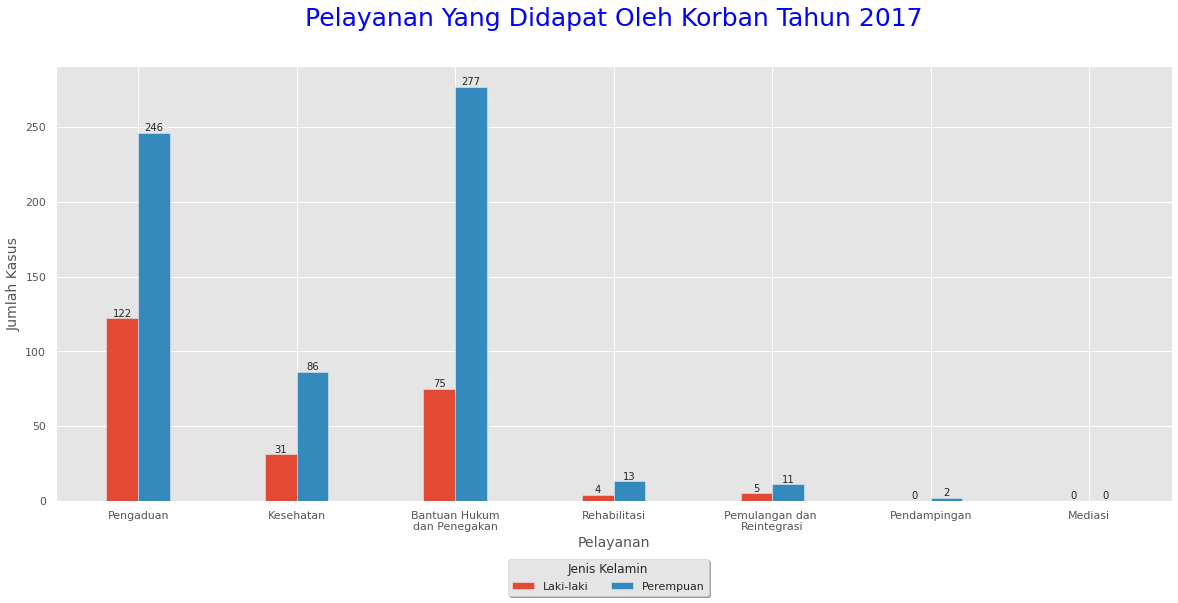

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('ggplot')
labels = ['Pengaduan','Kesehatan','Bantuan Hukum\ndan Penegakan','Rehabilitasi','Pemulangan dan \nReintegrasi','Pendampingan','Mediasi']
x = np.arange(7)
layanan17_t = np.transpose(layanan17)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(layanan17_t.columns):
  bar = plt.bar(x+(a*width), layanan17_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=layanan17_t.index, rotation=0)
ax.set_xticklabels(labels)
ax.set_title('Pelayanan Yang Didapat Oleh Korban Tahun 2017', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Pelayanan', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.59,-0.12), title='Jenis Kelamin')
plt.show()

In [ ]:
datalayanan18 = data[data['Tahun'] == 2018]
layanan18=datalayanan18[['Jenis Kelamin','Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']]
layanan18 = layanan18.groupby(['Jenis Kelamin'])[['Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']].sum()

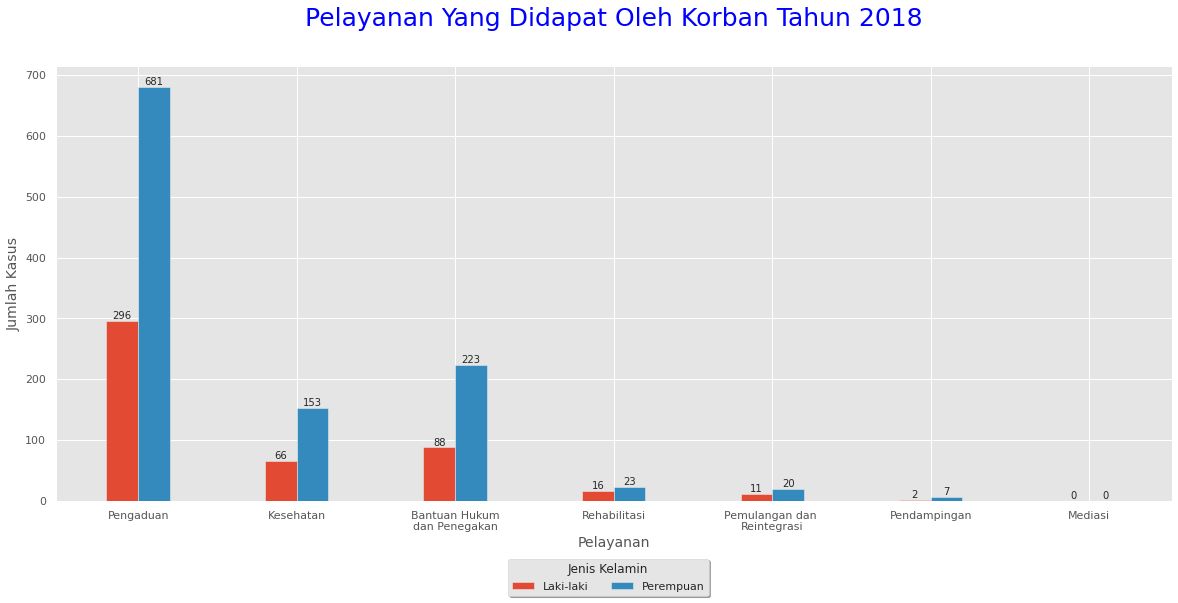

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('ggplot')
labels = ['Pengaduan','Kesehatan','Bantuan Hukum\ndan Penegakan','Rehabilitasi','Pemulangan dan \nReintegrasi','Pendampingan','Mediasi']
x = np.arange(7)
layanan18_t = np.transpose(layanan18)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(layanan18_t.columns):
  bar = plt.bar(x+(a*width), layanan18_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=layanan18_t.index, rotation=0)
ax.set_xticklabels(labels)
ax.set_title('Pelayanan Yang Didapat Oleh Korban Tahun 2018', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Pelayanan', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.59,-0.12), title='Jenis Kelamin')
plt.show()

In [ ]:
datalayanan19 = data[data['Tahun'] == 2019]
layanan19=datalayanan19[['Jenis Kelamin','Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']]
layanan19 = layanan19.groupby(['Jenis Kelamin'])[['Pengaduan','Kesehatan','Bantuan Hukum dan Penegakan','Penegakan','Rehabilitasi Sosial','Pemulangan dan Reintegrasi Sosial','Pendampingan Tokoh Agama','Mediasi']].sum()

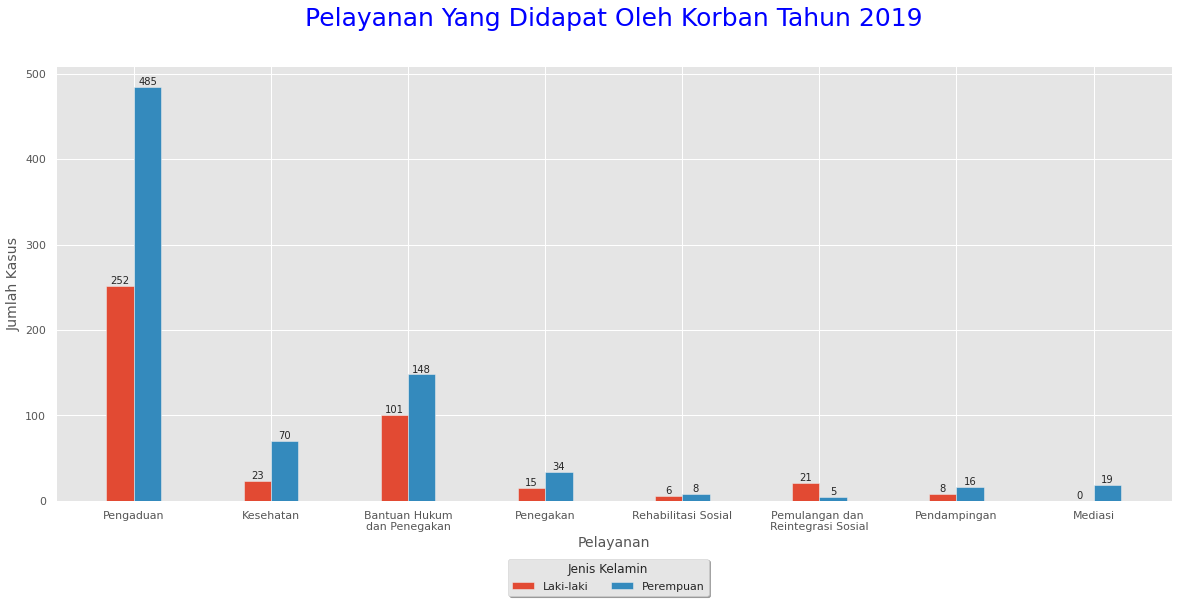

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use('ggplot')
labels = ['Pengaduan','Kesehatan','Bantuan Hukum\ndan Penegakan','Penegakan','Rehabilitasi Sosial','Pemulangan dan \nReintegrasi Sosial','Pendampingan','Mediasi']
x = np.arange(8)
layanan19_t = np.transpose(layanan19)
width = 0.2

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1*height,
    str(round(height,2)), # 3 points vertical offset
    ha='center', va='bottom')

for a, b in enumerate(layanan19_t.columns):
  bar = plt.bar(x+(a*width), layanan19_t[b], width=width, label=b)
  autolabel(bar)

plt.xticks(x+0.1, labels=layanan19_t.index, rotation=0)
ax.set_xticklabels(labels)
ax.set_title('Pelayanan Yang Didapat Oleh Korban Tahun 2019', fontsize=25, pad=40, color='blue')
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Pelayanan', fontsize=14)
plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.59,-0.12), title='Jenis Kelamin')
plt.show()

# Data Pre-Processing

## Data Cleaning

In [ ]:
missing_values = data.isnull()

print('Check Missing Values:\n')
for column in missing_values.columns.values.tolist():
  print(column)
  print(missing_values[column].value_counts())
  print('')

Check Missing Values:

Tahun
False    198
Name: Tahun, dtype: int64

Kabupaten/Kota
False    198
Name: Kabupaten/Kota, dtype: int64

Kekerasan Fisik
False    198
Name: Kekerasan Fisik, dtype: int64

Kekerasan Psikis
False    198
Name: Kekerasan Psikis, dtype: int64

Kekerasan Seksual
False    198
Name: Kekerasan Seksual, dtype: int64

Eksploitasi
False    198
Name: Eksploitasi, dtype: int64

Trafficking
False    198
Name: Trafficking, dtype: int64

Penelantaran
False    198
Name: Penelantaran, dtype: int64

Kekerasan Lainnya
False    198
Name: Kekerasan Lainnya, dtype: int64

0-5 tahun
False    198
Name: 0-5 tahun, dtype: int64

6-12 tahun
False    198
Name: 6-12 tahun, dtype: int64

13-17 tahun
False    198
Name: 13-17 tahun, dtype: int64

Rumah
False    198
Name: Rumah, dtype: int64

Tempat Bekerja
False    198
Name: Tempat Bekerja, dtype: int64

Lingkungan Masyarakat
False    198
Name: Lingkungan Masyarakat, dtype: int64

Sekolah
False    198
Name: Sekolah, dtype: int64

Lainnya
Fal

In [ ]:
from scipy import stats
datazscore = data.copy()
datazscore.drop(['Kabupaten/Kota','Jenis Kelamin','Rekan Kerja'], axis=1, inplace=True)

# Find the outliers using Z score
zscore = np.abs(stats.zscore(datazscore))
print('Nilai Zscore:\n',zscore)
print('\n')

threshold = 3
thres_zscore = zscore>3
loc = np.where(thres_zscore)
print('Lokasi Outliers:\n',loc)
print('Jumlah Outliers Pada Dataset:\n', thres_zscore.sum())

Nilai Zscore:
 [[1.22474487 0.10637263 0.45008893 ... 0.21882097 0.19258406 0.08387315]
 [1.22474487 0.73822602 0.14225609 ... 0.37469344 0.19258406 0.08387315]
 [1.22474487 0.52760823 0.62732602 ... 0.21882097 0.19258406 0.08387315]
 ...
 [1.22474487 0.52548077 0.31949318 ... 0.21882097 0.19258406 0.08387315]
 [1.22474487 0.10637263 0.29617251 ... 0.21882097 0.19258406 0.08387315]
 [1.22474487 0.73609857 0.45008893 ... 0.21882097 0.19258406 0.08387315]]


Lokasi Outliers:
 (array([  7,   8,   9,   9,  11,  20,  20,  20,  21,  22,  23,  26,  26,
        26,  26,  26,  26,  26,  26,  26,  26,  26,  27,  27,  27,  27,
        27,  27,  27,  27,  27,  44,  44,  45,  45,  45,  49,  56,  57,
        58,  58,  59,  59,  62,  63,  63,  63,  74,  74,  75,  75,  75,
        75,  75,  75,  76,  80,  81,  81,  86,  86,  87,  89,  89,  89,
        89,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  93,
        93,  93,  93,  93,  93,  93,  93,  93,  93,  93,  93, 115, 122,
       123, 128,

## Encoding

In [ ]:
encoder = LabelEncoder()
data['Kabupaten/Kota'] = encoder.fit_transform(data['Kabupaten/Kota'])
data['Jenis Kelamin'] = encoder.fit_transform(data['Jenis Kelamin'])
print('Data setelah LabelEncoder:')
data.head(10)

Data setelah LabelEncoder:


,Tahun,Kabupaten/Kota,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Rumah,Tempat Bekerja,Lingkungan Masyarakat,Sekolah,Lainnya,Fasilitas Umum,Orang Tua,Keluarga,Tetangga,Petugas di sekolah (Guru dll),Teman dekat,Lainnya.1,Na,Suami/Istri,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi,Jenis Kelamin
0,2017,0,4,0,0,0,0,3,0,3,1,4,0,0,0,0,0,0,9,5,4,1,9,9,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2017,0,7,2,26,0,0,1,1,1,6,28,1,0,7,1,0,0,3,0,1,0,0,2,0,0,0,0,1,1,0,0,1,1,0,0,1
2,2017,1,6,7,0,0,0,15,2,3,2,2,6,0,3,1,0,0,14,4,3,0,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,1,2,9,5,0,0,10,5,1,2,2,10,0,4,1,0,0,1,1,2,0,0,0,0,0,0,0,3,0,4,0,0,1,0,0,1
4,2017,25,2,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,1,1,2,0,1,3,0,0,0,0,2,0,0,0,0,0,0,0,0
5,2017,25,1,1,5,0,0,1,0,4,1,2,6,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1
6,2017,2,6,5,0,0,0,0,0,0,0,6,0,0,3,0,1,0,3,2,6,2,5,0,0,0,0,0,8,0,15,0,1,0,0,0,0
7,2017,2,1,7,17,0,0,0,1,4,9,7,1,0,4,0,9,0,0,2,1,2,0,0,0,0,0,0,15,7,47,0,0,0,0,0,1
8,2017,3,3,2,3,0,0,9,5,8,9,3,16,0,16,1,4,0,8,8,19,0,9,8,0,0,0,0,0,0,2,0,0,0,0,0,0
9,2017,3,4,2,27,0,0,5,5,2,12,22,39,0,23,3,7,0,0,0,1,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,1


# Data Transformation

## Feature Selection

In [ ]:
data.head()

,Tahun,Kabupaten/Kota,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,Kekerasan Lainnya,0-5 tahun,6-12 tahun,13-17 tahun,Rumah,Tempat Bekerja,Lingkungan Masyarakat,Sekolah,Lainnya,Fasilitas Umum,Orang Tua,Keluarga,Tetangga,Petugas di sekolah (Guru dll),Teman dekat,Lainnya.1,Na,Suami/Istri,Majikan,Rekan Kerja,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi,Jenis Kelamin
0,2017,0,4,0,0,0,0,3,0,3,1,4,0,0,0,0,0,0,9,5,4,1,9,9,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2017,0,7,2,26,0,0,1,1,1,6,28,1,0,7,1,0,0,3,0,1,0,0,2,0,0,0,0,1,1,0,0,1,1,0,0,1
2,2017,1,6,7,0,0,0,15,2,3,2,2,6,0,3,1,0,0,14,4,3,0,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,1,2,9,5,0,0,10,5,1,2,2,10,0,4,1,0,0,1,1,2,0,0,0,0,0,0,0,3,0,4,0,0,1,0,0,1
4,2017,25,2,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,1,1,2,0,1,3,0,0,0,0,2,0,0,0,0,0,0,0,0


In [ ]:
data = data.drop(['Kabupaten/Kota','Tahun','Kekerasan Lainnya','Lainnya'], axis=1)
datadrop=data.iloc[:,9:24]
data = data.drop(datadrop, axis=1)
data.head()

,Kekerasan Fisik,Kekerasan Psikis,Kekerasan Seksual,Eksploitasi,Trafficking,Penelantaran,0-5 tahun,6-12 tahun,13-17 tahun,Pengaduan,Kesehatan,Bantuan Hukum dan Penegakan,Penegakan,Rehabilitasi Sosial,Pemulangan dan Reintegrasi Sosial,Pendampingan Tokoh Agama,Mediasi,Jenis Kelamin
0,4,0,0,0,0,3,3,1,4,1,0,0,0,0,0,0,0,0
1,7,2,26,0,0,1,1,6,28,1,1,0,0,1,1,0,0,1
2,6,7,0,0,0,15,3,2,2,0,0,0,0,0,0,0,0,0
3,2,9,5,0,0,10,1,2,2,3,0,4,0,0,1,0,0,1
4,2,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0


# Data Modelling

In [ ]:
X = data.drop(['Jenis Kelamin'], axis=1)
y = data[['Jenis Kelamin']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train shape :\n', X_train.shape)
print('X_test shape :\n', X_test.shape)
print('Baris X_train shape:\n', X_train.shape[0])
print('Kolom X_train shape:\n', X_train.shape[1])

print('Baris X_test shape:\n', X_test.shape[0])
print('Kolom X_test shape:\n', X_test.shape[1])

X_train shape :
 (158, 17)
X_test shape :
 (40, 17)
Baris X_train shape:
 158
Kolom X_train shape:
 17
Baris X_test shape:
 40
Kolom X_test shape:
 17


In [ ]:
print('y_train shape :\n', y_train.shape)
print('y_test shape :\n', y_test.shape)
print('Baris y_train shape:\n', y_train.shape[0])
print('Baris y_train shape:\n', y_test.shape[0])

y_train shape :
 (158, 1)
y_test shape :
 (40, 1)
Baris y_train shape:
 158
Baris y_train shape:
 40


## Data Transformation (Normalization)

In [ ]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

print('Normalisasi X_train 80%:\n', X_train_scaler)
print('Normalisasi X_test 20%:\n', X_test_scaler)

Normalisasi X_train 80%:
 [[0.2173913  0.18       0.         ... 0.         1.         0.        ]
 [0.04347826 0.02       0.0877193  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.73913043 0.14       0.03508772 ... 0.125      0.         0.        ]
 [0.         0.         0.1754386  ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Normalisasi X_test 20%:
 [[0.04347826 0.04       0.0877193  0.         0.         0.
  0.04166667 0.0625     0.10416667 0.01219512 0.         0.01388889
  0.         0.         0.         0.         0.        ]
 [0.13043478 0.         0.         0.         0.         0.02083333
  0.         0.02083333 0.04166667 0.03658537 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.60869565 0.04       0.01754386 0.         0.         0.02083333
  0.02083333 0.10416667 0.10416667 0.         0.         0.
  0. 

## Data Modelling (Implementation Algorithm)

### Split 80%:20%

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaler, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnbscore_train = gnb.score(X_train_scaler, y_train)
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(gnbscore_train))

gnbscore_test = gnb.score(X_test_scaler, y_test)
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(gnbscore_test))

scores = cross_val_score(gnb, X, y.values.ravel(), cv=10)
print('Keakuratan Gaussian NB dengan dataset:', scores.mean())
print('%0.2f akurasi dengan standar deviasi sebesar %0.2f' %(scores.mean(), scores.std()))

Accuracy of Gaussian NB classifier on training set: 0.68
Accuracy of Gaussian NB classifier on test set: 0.57
Keakuratan Gaussian NB dengan dataset: 0.6463157894736842
0.65 akurasi dengan standar deviasi sebesar 0.06


In [ ]:
print('0=Laki-laki\n1=Perempuan\n')
print('Peluang tiap class pada dataset:\n', gnb.class_prior_)

0=Laki-laki
1=Perempuan

Peluang tiap class pada dataset:
 [0.51898734 0.48101266]


In [ ]:
print('Mean tiap feature: \n', gnb.theta_)
print('\nVariansi tiap feature: \n', gnb.sigma_)

Mean tiap feature: 
 [[0.15111347 0.03560976 0.02545999 0.00304878 0.         0.04979675
  0.03455285 0.06732724 0.07901423 0.07733492 0.04051928 0.03404472
  0.00938086 0.02439024 0.02743902 0.01067073 0.        ]
 [0.1493135  0.07421053 0.23730379 0.02302632 0.02631579 0.05400219
  0.0745614  0.14939693 0.20696272 0.16848524 0.09847199 0.08899854
  0.03137652 0.04066986 0.04769737 0.03453947 0.01973684]]

Variansi tiap feature: 
 [[3.92929877e-02 1.32587746e-02 1.99800648e-03 7.52900104e-04
  4.43060692e-11 1.78772453e-02 1.22503760e-02 1.42308052e-02
  9.45056116e-03 1.77239866e-02 1.25583355e-02 8.38956851e-03
  2.94273982e-03 8.47586791e-03 1.56342951e-02 6.93644041e-03
  4.43060692e-11]
 [4.97132388e-02 2.31349031e-02 6.01437988e-02 1.50947888e-02
  1.90443214e-02 2.02756948e-02 2.28237295e-02 3.39385527e-02
  5.79808060e-02 5.34523253e-02 4.45231047e-02 4.53936081e-02
  2.10491485e-02 1.98770633e-02 2.13680532e-02 2.45060380e-02
  1.60578255e-02]]


In [ ]:
y_pred_gaussian = gnb.predict(X_test_scaler)
print('Angka kesalahan label point dari total %d points : %d' %(X_test_scaler.shape[0], (y_test.values.ravel() != y_pred_gaussian).sum()))

Angka kesalahan label point dari total 40 points : 17


In [ ]:
y_pred_gaussian_ds = gnb.predict([[0.608696,0.217391,0,0.25,0,
                                   0.041667,0,0.166667,0.125,
                                   0.170732,0,0.032609,0,0.090909,
                                   0,0,0]])
print('Prediksi Data Sampel Pertama:', y_pred_gaussian_ds)

y_pred_gauss_ds2 = gnb.predict([[1,1.086957,0.052632,0,0,0.541667,
                                 0.791667,0.6875,0.458333,0.012195,
                                 0,0.01087,0,0,0,0,0]])
print('Prediksi Data Sampel Kedua:', y_pred_gauss_ds2)

Prediksi Data Sampel Pertama: [1]
Prediksi Data Sampel Kedua: [1]


In [ ]:
print('Prediksi seluruh data sampel:\n', y_pred_gaussian)
print('Seluruh data aktual:\n', y_test.values.ravel())

Prediksi seluruh data sampel:
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1]
Seluruh data aktual:
 [1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0
 1 1 0]


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred_gaussian)
confusion_mat

array([[15,  2],
       [15,  8]])

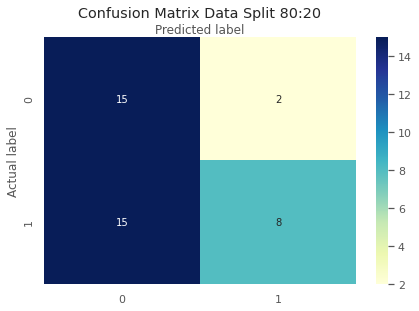

In [ ]:
fig, ax = plt.subplots()
class_names=[0,1] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Data Split 80:20', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusionmatriks 8020.png')
plt.show()

In [ ]:
print('Pengujian Evaluasi Data Split 80:20')
print(classification_report(y_test, y_pred_gaussian))

Pengujian Evaluasi Data Split 80:20
              precision    recall  f1-score   support

           0       0.50      0.88      0.64        17
           1       0.80      0.35      0.48        23

    accuracy                           0.57        40
   macro avg       0.65      0.62      0.56        40
weighted avg       0.67      0.57      0.55        40



In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.5506
Test set score: 0.6000


### Process of visualization the model

In [ ]:
testpred = pd.DataFrame({'Nilai Test':y_test.values.ravel(),'Nilai Prediksi':y_pred_gaussian})

In [ ]:
testpred[testpred['Nilai Prediksi']==1].count()

Nilai Test        10
Nilai Prediksi    10
dtype: int64

In [ ]:
predtest = pd.DataFrame({'Nilai Prediksi': ['0','1'], 'Total': [26,14], 'Nilai Test': ['0','1'],'Total Test':[22,18]}, index=[0,1])
predtestgroup = predtest.groupby(['Nilai Prediksi'])[['Total']].mean().reset_index()
pred_testgroup = predtest.groupby(['Nilai Test'])[['Total Test']].mean().reset_index()

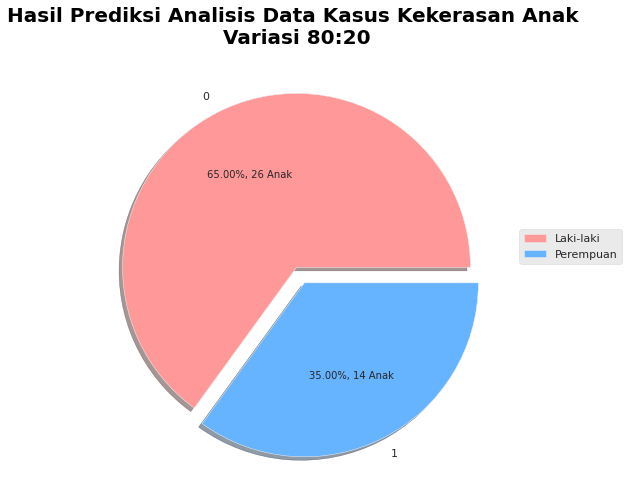

In [ ]:
valuespred20 = predtestgroup['Total']
valuesact20 = pred_testgroup['Total Test']

fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#66b3ff']
piechart = ax.pie(predtestgroup['Total'], labels=predtestgroup['Nilai Prediksi'], 
          autopct=lambda p:f'{p:.2f}%, {p*sum(valuespred20)/100 :.0f} Anak', explode=explode, shadow=True, colors=my_colors,
          startangle=0)

ax.set_title('Hasil Prediksi Analisis Data Kasus Kekerasan Anak \nVariasi 80:20', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Laki-laki','Perempuan'])

plt.savefig('visualisasi data akhir 8020.png')
plt.show()

### Split 70%:30%

In [ ]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train shape :\n', X_train30.shape)
print('X_test shape :\n', X_test30.shape)
print('Baris X_train shape :\n', X_train30.shape[0])
print('Kolom X_train shape :\n', X_train30.shape[1])

print('Baris X_test shape :\n', X_test30.shape[0])
print('Kolom X_test shape:\n', X_test30.shape[1])

X_train shape :
 (158, 17)
X_test shape :
 (40, 17)
Baris X_train shape :
 158
Kolom X_train shape :
 17
Baris X_test shape :
 40
Kolom X_test shape:
 17


In [ ]:
print('y_train shape :\n', y_train30.shape)
print('y_test shape :\n', y_test30.shape)
print('Baris y_train :\n', y_train30.shape[0])
print('Kolom y_test :\n', y_test30.shape[0])

y_train shape :
 (158, 1)
y_test shape :
 (40, 1)
Baris y_train :
 158
Kolom y_test :
 40


In [ ]:
scaler = MinMaxScaler()
X_train_scaler30 = scaler.fit_transform(X_train30)
X_test_scaler30 = scaler.transform(X_test30)

In [ ]:
print('Normalisasi X_train 70%:\n', X_train_scaler30)
print('Normalisasi X_test 30%:\n', X_test_scaler30)

Normalisasi X_train 70%:
 [[0.2173913  0.18       0.         ... 0.         1.         0.        ]
 [0.04347826 0.02       0.0877193  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.73913043 0.14       0.03508772 ... 0.125      0.         0.        ]
 [0.         0.         0.1754386  ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Normalisasi X_test 30%:
 [[0.04347826 0.04       0.0877193  0.         0.         0.
  0.04166667 0.0625     0.10416667 0.01219512 0.         0.01388889
  0.         0.         0.         0.         0.        ]
 [0.13043478 0.         0.         0.         0.         0.02083333
  0.         0.02083333 0.04166667 0.03658537 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.60869565 0.04       0.01754386 0.         0.         0.02083333
  0.02083333 0.10416667 0.10416667 0.         0.         0.
  0. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb30 = GaussianNB()
gnb30.fit(X_train_scaler30, y_train30.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(gnb30.score(X_train_scaler30, y_train30)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(gnb30.score(X_test_scaler30, y_test30)))

scores = cross_val_score(gnb30, X, y.values.ravel(), cv=10)
print('Keakuratan Gaussian NB dengan dataset:', scores.mean())
print('%0.2f akurasi dengan standar deviasi sebesar %0.2f' %(scores.mean(), scores.std()))

Accuracy of Gaussian NB classifier on training set: 0.68
Accuracy of Gaussian NB classifier on test set: 0.57
Keakuratan Gaussian NB dengan dataset: 0.6463157894736842
0.65 akurasi dengan standar deviasi sebesar 0.06


In [ ]:
print('0=Laki-laki\n1=Perempuan\n')
print('Peluang tiap class pada dataset:\n', gnb30.class_prior_)

0=Laki-laki
1=Perempuan

Peluang tiap class pada dataset:
 [0.51898734 0.48101266]


In [ ]:
print('Mean data latih 70%:', gnb30.theta_)
print('Varians data latih 70%:', gnb30.sigma_)

Mean data latih 70%: [[0.15111347 0.03560976 0.02545999 0.00304878 0.         0.04979675
  0.03455285 0.06732724 0.07901423 0.07733492 0.04051928 0.03404472
  0.00938086 0.02439024 0.02743902 0.01067073 0.        ]
 [0.1493135  0.07421053 0.23730379 0.02302632 0.02631579 0.05400219
  0.0745614  0.14939693 0.20696272 0.16848524 0.09847199 0.08899854
  0.03137652 0.04066986 0.04769737 0.03453947 0.01973684]]
Varians data latih 70%: [[3.92929877e-02 1.32587746e-02 1.99800648e-03 7.52900104e-04
  4.43060692e-11 1.78772453e-02 1.22503760e-02 1.42308052e-02
  9.45056116e-03 1.77239866e-02 1.25583355e-02 8.38956851e-03
  2.94273982e-03 8.47586791e-03 1.56342951e-02 6.93644041e-03
  4.43060692e-11]
 [4.97132388e-02 2.31349031e-02 6.01437988e-02 1.50947888e-02
  1.90443214e-02 2.02756948e-02 2.28237295e-02 3.39385527e-02
  5.79808060e-02 5.34523253e-02 4.45231047e-02 4.53936081e-02
  2.10491485e-02 1.98770633e-02 2.13680532e-02 2.45060380e-02
  1.60578255e-02]]


In [ ]:
y_pred_gauss_ds30 = gnb30.predict([[0.85,0.130435,0.140351,1.25,
                                    0,0.208333,0.395833,0.4375,
                                    0.166667, 0.585366,0.290323,
                                    0.336957,0.384615,0.090909,0,0,0]])
print('Prediksi Data Sampel Pertama:', y_pred_gauss_ds30)

y_pred_ds2 = gnb30.predict([[0.15,0,0.526316,0,0,0,0.083333,0.416667,
                             0.1875,0.317073,0,0,0,0,0,0,0]])
print('Prediksi Data Sampel Kedua:', y_pred_ds2)


Prediksi Data Sampel Pertama: [1]
Prediksi Data Sampel Kedua: [1]


In [ ]:
y_pred_gauss_30_all = gnb30.predict(X_test_scaler30)
print('Prediksi keseluruhan data sampel 30%:\n', y_pred_gauss_30_all)
print('Data sampel 30% sebelum prediksi:\n', y_test30.values.ravel())

Prediksi keseluruhan data sampel 30%:
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1]
Data sampel 30% sebelum prediksi:
 [1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0
 1 1 0]


In [ ]:
confusion_mat = confusion_matrix(y_test30, y_pred_gauss_30_all)
confusion_mat

array([[15,  2],
       [15,  8]])

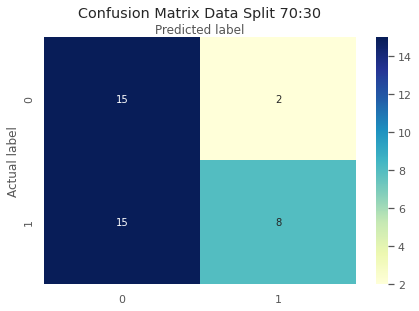

In [ ]:
fig, ax = plt.subplots()
class_names=[1,2] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Data Split 70:30', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion matriks 7030.png')
plt.show()

In [ ]:
print('Pengujian Evaluasi Data Split 70:30')
print(classification_report(y_test30, y_pred_gauss_30_all))

Pengujian Evaluasi Data Split 70:30
              precision    recall  f1-score   support

           0       0.50      0.88      0.64        17
           1       0.80      0.35      0.48        23

    accuracy                           0.57        40
   macro avg       0.65      0.62      0.56        40
weighted avg       0.67      0.57      0.55        40



## Visualization the model with data train 70%

In [ ]:
Predict30 = pd.DataFrame(y_pred_gauss_30_all, columns=['Predict'])
Predict30['Validation'] = y_test30.values.ravel()

In [ ]:
Predict30[Predict30['Predict']==1].count()

Predict       10
Validation    10
dtype: int64

In [ ]:
predtest30 = pd.DataFrame({'Nilai Prediksi': ['0','1'], 'Total': [44,16], 'Nilai Test': ['0','1'],'Total Test':[35,25]}, index=[0,1])
predtestgroup30 = predtest30.groupby(['Nilai Prediksi'])[['Total']].mean().reset_index()
pred_testgroup30 = predtest30.groupby(['Nilai Test'])[['Total Test']].mean().reset_index()

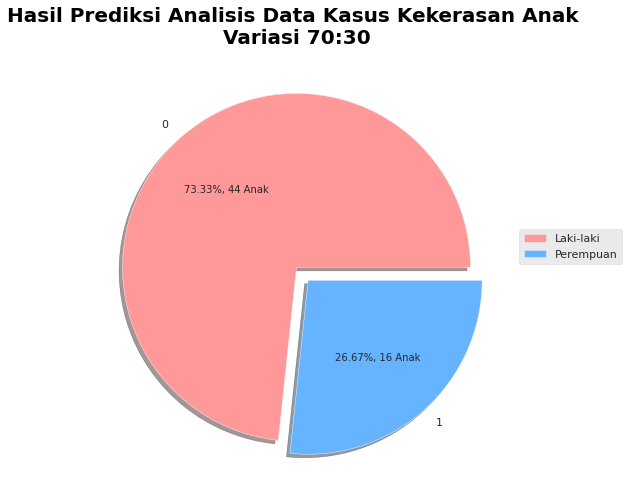

In [ ]:
valuespred30 = predtestgroup30['Total']
valuesact30 = pred_testgroup30['Total Test']

fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#66b3ff']
ax.pie(predtestgroup30['Total'], labels=predtestgroup30['Nilai Prediksi'], 
         autopct=lambda p:f'{p:.2f}%, {p*sum(valuespred30)/100 :.0f} Anak', explode=explode, shadow=True, colors=my_colors,
          startangle=0)
ax.set_title('Hasil Prediksi Analisis Data Kasus Kekerasan Anak \nVariasi 70:30', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Laki-laki','Perempuan'])

plt.savefig('visualisasi prediksi 7030.png')
plt.show()

## Split 60%:40%

In [ ]:
X_train40, X_test40, y_train40, y_test40 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train :\n', X_train40.shape)
print('X_test :\n', X_test40.shape)
print('Baris X_train :\n', X_train40.shape[0])
print('Kolom X_train :\n', X_train40.shape[1])

print('Baris X_test :\n', X_test40.shape[0])
print('Kolom X_test :\n', X_test40.shape[1])

X_train :
 (158, 17)
X_test :
 (40, 17)
Baris X_train :
 158
Kolom X_train :
 17
Baris X_test :
 40
Kolom X_test :
 17


In [ ]:
print('y_train :\n', y_train40.shape)
print('y_test :\n', y_test40.shape)
print('Baris y_train :\n', y_train40.shape[0])
print('Baris y_test :\n', y_test40.shape[0])

y_train :
 (158, 1)
y_test :
 (40, 1)
Baris y_train :
 158
Baris y_test :
 40


In [ ]:
scaler = MinMaxScaler()
X_train_scaler40 = scaler.fit_transform(X_train40)
X_test_scaler40 = scaler.transform(X_test40)

In [ ]:
print('Normalisasi X_train 60%:\n', X_train_scaler40)
print('Normalisasi X_test 40%:\n', X_test_scaler40)

Normalisasi X_train 60%:
 [[0.2173913  0.18       0.         ... 0.         1.         0.        ]
 [0.04347826 0.02       0.0877193  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.73913043 0.14       0.03508772 ... 0.125      0.         0.        ]
 [0.         0.         0.1754386  ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Normalisasi X_test 40%:
 [[0.04347826 0.04       0.0877193  0.         0.         0.
  0.04166667 0.0625     0.10416667 0.01219512 0.         0.01388889
  0.         0.         0.         0.         0.        ]
 [0.13043478 0.         0.         0.         0.         0.02083333
  0.         0.02083333 0.04166667 0.03658537 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.60869565 0.04       0.01754386 0.         0.         0.02083333
  0.02083333 0.10416667 0.10416667 0.         0.         0.
  0. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb40 = GaussianNB()
gnb40.fit(X_train_scaler40, y_train40.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(gnb40.score(X_train_scaler40, y_train40)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(gnb40.score(X_test_scaler40, y_test40)))

scores = cross_val_score(gnb40, X, y.values.ravel(), cv=10)
print('Keakuratan Gaussian NB dengan dataset:', scores.mean())
print('%0.2f akurasi dengan standar deviasi sebesar %0.2f' %(scores.mean(), scores.std()))

Accuracy of Gaussian NB classifier on training set: 0.68
Accuracy of Gaussian NB classifier on test set: 0.57
Keakuratan Gaussian NB dengan dataset: 0.6463157894736842
0.65 akurasi dengan standar deviasi sebesar 0.06


In [ ]:
print('0=Laki-laki\n1=Perempuan\n')
print('Peluang tiap class pada dataset:\n', gnb40.class_prior_)

0=Laki-laki
1=Perempuan

Peluang tiap class pada dataset:
 [0.51898734 0.48101266]


In [ ]:
print('Mean tiap feature: \n', gnb40.theta_)
print('\nVariansi tiap feature: \n', gnb40.sigma_)

Mean tiap feature: 
 [[0.15111347 0.03560976 0.02545999 0.00304878 0.         0.04979675
  0.03455285 0.06732724 0.07901423 0.07733492 0.04051928 0.03404472
  0.00938086 0.02439024 0.02743902 0.01067073 0.        ]
 [0.1493135  0.07421053 0.23730379 0.02302632 0.02631579 0.05400219
  0.0745614  0.14939693 0.20696272 0.16848524 0.09847199 0.08899854
  0.03137652 0.04066986 0.04769737 0.03453947 0.01973684]]

Variansi tiap feature: 
 [[3.92929877e-02 1.32587746e-02 1.99800648e-03 7.52900104e-04
  4.43060692e-11 1.78772453e-02 1.22503760e-02 1.42308052e-02
  9.45056116e-03 1.77239866e-02 1.25583355e-02 8.38956851e-03
  2.94273982e-03 8.47586791e-03 1.56342951e-02 6.93644041e-03
  4.43060692e-11]
 [4.97132388e-02 2.31349031e-02 6.01437988e-02 1.50947888e-02
  1.90443214e-02 2.02756948e-02 2.28237295e-02 3.39385527e-02
  5.79808060e-02 5.34523253e-02 4.45231047e-02 4.53936081e-02
  2.10491485e-02 1.98770633e-02 2.13680532e-02 2.45060380e-02
  1.60578255e-02]]


In [ ]:
predict_40ds = gnb40.predict([[0.9,0.26087,0.75,0,0,1.6,0.625,
                               0.645833,1.043478, 1.025,0.677419,
                               0.75,0,0.636364,0.25,0,0]])
print('Prediksi Data Sampel Pertama:', predict_40ds)

predicted = gnb40.predict([[0.5,0.065217,0.403846,0,0,0.033333,
                            0.083333,0.104167,0.108696, 0.0625,
                            0,0,0,0,0,0,0]])
print('Prediksi Data Sampel Kedua:', predicted)


Prediksi Data Sampel Pertama: [1]
Prediksi Data Sampel Kedua: [1]


In [ ]:
y_pred_gauss_40_all = gnb40.predict(X_test_scaler40)

In [ ]:
print('Prediksi data sampel 40% :\n', y_pred_gauss_40_all)
print('Data sampel 40% sebelum diprediksi:\n', y_test40.values.ravel())

Prediksi data sampel 40% :
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1]
Data sampel 40% sebelum diprediksi:
 [1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0
 1 1 0]


In [ ]:
confusion_mat40 = confusion_matrix(y_test40, y_pred_gauss_40_all)
confusion_mat40

array([[15,  2],
       [15,  8]])

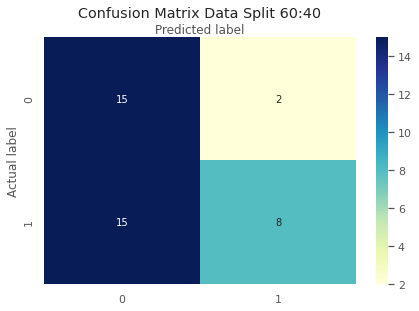

In [ ]:
fig, ax = plt.subplots()
class_names=[1,2] # name  of classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_mat40), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Data Split 60:40', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion matrix 6040.png')
plt.show()

In [ ]:
print('Pengujian Evaluasi Data Split 60:40')
print(classification_report(y_test40, y_pred_gauss_40_all))

Pengujian Evaluasi Data Split 60:40
              precision    recall  f1-score   support

           0       0.50      0.88      0.64        17
           1       0.80      0.35      0.48        23

    accuracy                           0.57        40
   macro avg       0.65      0.62      0.56        40
weighted avg       0.67      0.57      0.55        40



## visualization the model 

In [ ]:
testpred40 = pd.DataFrame({'Nilai Test':y_test40.values.ravel(),'Nilai Prediksi':y_pred_gauss_40_all})

In [ ]:
testpred40[testpred40['Nilai Prediksi']==1].count()

Nilai Test        10
Nilai Prediksi    10
dtype: int64

In [ ]:
predtest40 = pd.DataFrame({'Nilai Prediksi': ['0','1'], 'Total': [63,17], 'Nilai Test': ['0','1'],'Total Test':[46,34]}, index=[0,1])
predtestgroup40 = predtest40.groupby(['Nilai Prediksi'])[['Total']].mean().reset_index()
pred_testgroup40 = predtest40.groupby(['Nilai Test'])[['Total Test']].mean().reset_index()

In [ ]:
predtestgroup40

,Nilai Prediksi,Total
0,0,63
1,1,17


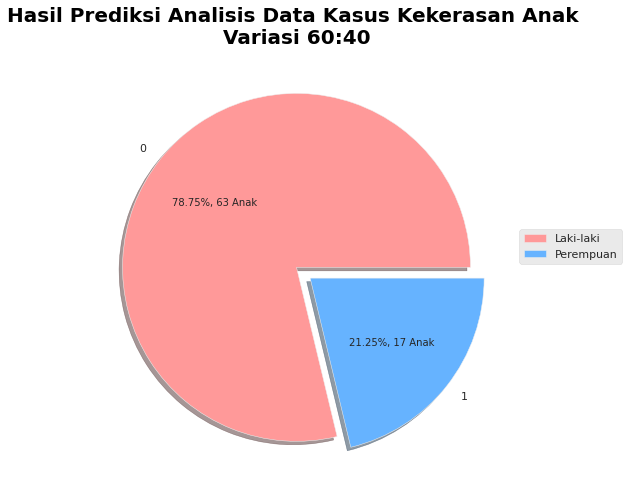

In [ ]:
valuespred40 = predtestgroup40['Total']
valuesact40 = pred_testgroup40['Total Test']

fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#66b3ff']
ax.pie(predtestgroup40['Total'], labels=predtestgroup40['Nilai Prediksi'], 
          autopct=lambda p:f'{p:.2f}%, {p*sum(valuespred40)/100 :.0f} Anak', explode=explode, shadow=True, colors = my_colors,
          startangle=0)
ax.set_title('Hasil Prediksi Analisis Data Kasus Kekerasan Anak \nVariasi 60:40', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Laki-laki','Perempuan'])

plt.savefig('visualisasi 6040.png')
plt.show()